<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/dos%20results%20ver%201.1/models/fft_r1_model-1-6-12-14-vs-13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [95]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-3-r1.csv?token=AKVFSOEVHMKCJQ65CFLMYI26ZJG32')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1
1,84,4,2,1,1,4,3,9,3,3,24,8,3,5,2,0.400000,12,1,2,2,2,4,8,1,4,12,3,27,9,1
2,216,2,4,1,1,4,3,9,0,0,22,6,6,3,1,0.333333,8,1,1,1,1,1,8,1,4,24,3,27,9,1
3,342,2,4,1,1,4,3,9,0,0,23,7,8,4,1,0.250000,8,1,1,1,1,1,8,1,4,32,3,27,9,1
4,388,1,2,1,1,4,3,9,3,3,21,5,9,3,2,0.666667,12,1,1,1,1,1,2,1,4,36,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56912,3268816,4,2,6,2,2,3,9,18,2,20,4,20042,3,1,0.333333,15,5,1,5,5,25,8,12,24,481008,18,27,54,1
56913,3268823,4,2,6,3,2,3,9,18,2,20,4,20042,3,1,0.333333,22,4,2,5,8,40,8,18,36,721512,18,27,54,1
56914,3268830,4,2,6,4,2,3,9,18,2,20,4,20042,3,1,0.333333,29,3,3,5,9,45,8,24,48,962016,18,27,54,1
56915,3268837,4,2,6,5,3,3,9,18,2,20,4,20042,3,1,0.333333,36,2,4,5,8,40,8,30,90,1803780,18,27,54,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-1-r1.csv?token=AKVFSODBXB5IUCFE6ERSQMC6ZJG32')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-6-r1.csv?token=AKVFSOGMU5OD4YODOXGQVU26ZJG36')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-12-r1.csv?token=AKVFSOBGHE7BH2DKQKVC5T26ZJIMO')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-14-r1.csv?token=AKVFSOG5FLJP4JXI2E2QCES6ZJG64')

In [97]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(127850, 30)
(69441, 30)
(69998, 30)
(69041, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [99]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1
2,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
3,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
4,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393242,3273641,4,2,6,3,2,3,9,18,2,20,4,30054,3,1,0.333333,22,1,1,1,1,1,8,18,36,1081944,18,27,54,0
393243,3273648,4,2,6,4,2,3,9,18,2,20,4,30054,3,1,0.333333,29,1,1,1,1,1,8,24,48,1442592,18,27,54,0
393244,3273655,4,2,6,5,3,3,9,18,2,20,4,30054,3,1,0.333333,36,1,1,1,1,1,8,30,90,2704860,18,27,54,0
393245,3273656,4,2,2,1,4,3,10,18,2,20,4,30055,3,1,0.333333,36,2,1,2,2,4,8,2,8,240440,6,30,18,0


In [100]:
df.shape

(393247, 30)

Test Data

In [101]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-13-r1.csv?token=AKVFSOBJ6YDCG2K3JNTO6O26ZJJBG')
df5.shape

(70287, 30)

In [102]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
1,84,4,2,1,1,4,3,9,3,3,24,8,4,5,2,0.400000,12,1,2,2,2,4,8,1,4,16,3,27,9,0
2,238,2,4,1,1,4,3,9,0,0,22,6,9,3,1,0.333333,8,1,1,1,1,1,8,1,4,36,3,27,9,0
3,365,2,4,1,1,4,3,9,0,0,23,7,12,4,1,0.250000,8,1,1,1,1,1,8,1,4,48,3,27,9,0
4,386,1,2,1,1,4,3,9,3,3,21,5,13,3,2,0.666667,12,1,1,1,1,1,2,1,4,52,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70282,3270654,2,4,1,1,4,3,10,0,0,22,6,30075,3,1,0.333333,36,1,6,6,6,36,8,1,4,120300,3,30,9,0
70283,3270850,2,4,5,1,1,3,9,0,0,27,11,30076,5,1,0.200000,8,1,1,1,1,1,8,5,5,150380,15,27,45,0
70284,3270857,2,4,5,2,2,3,9,0,0,27,11,30076,5,1,0.200000,15,3,1,3,3,9,8,10,20,601520,15,27,45,0
70285,3270864,2,4,5,3,2,3,9,0,0,27,11,30076,5,1,0.200000,22,2,2,3,4,12,8,15,30,902280,15,27,45,0


In [103]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [105]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.227044,0.236517,0.005671,-0.008544,-0.390735,-0.284259,-0.020174,0.212460,-0.329989,-0.586932,0.048113,-0.082990,0.076143,-0.004580,0.015534,0.010894,0.489418,0.129761,0.102994,0.060552,0.069173,-0.352958,-0.142986,0.041534
inport,-0.227044,1.000000,-0.123453,0.029463,-0.044387,-0.202288,-0.364919,0.015865,0.292474,0.101666,0.164017,0.140999,-0.064428,-0.190412,-0.170461,-0.144232,-0.121830,0.617180,-0.016370,-0.028590,-0.010026,-0.200718,-0.275766,-0.247721,0.135359
cache_coherence_type,0.236517,-0.123453,1.000000,0.355925,-0.536219,-0.114726,-0.176116,0.001418,-0.050803,-0.099738,-0.132154,-0.422205,0.065783,-0.042956,0.015269,0.028162,0.024605,0.043902,0.543006,0.432702,0.306460,0.915404,-0.143220,0.615327,-0.002666
flit_id,0.005671,0.029463,0.355925,1.000000,-0.031679,0.077139,-0.007734,0.017802,0.039575,0.017285,-0.006710,0.500582,0.014054,0.041062,0.036867,0.055192,0.034792,0.020739,0.966995,0.930488,0.687196,0.373619,0.042400,0.312623,-0.001860
flit_type,-0.008544,-0.044387,-0.536219,-0.031679,1.000000,-0.116214,0.011652,-0.026820,-0.059621,-0.026040,0.010109,0.553909,-0.140117,0.180136,0.026768,-0.008045,-0.006796,-0.031245,-0.126736,0.127897,0.089770,-0.562876,-0.063878,-0.470982,0.002803
vnet,-0.390735,-0.202288,-0.114726,0.077139,-0.116214,1.000000,0.921229,0.025084,-0.059485,0.441877,0.457759,-0.119214,0.079503,0.063386,0.095578,0.065127,0.044592,-0.304864,-0.026870,-0.032282,-0.012085,0.294859,0.986091,0.712474,-0.110558
vc,-0.284259,-0.364919,-0.176116,-0.007734,0.011652,0.921229,1.000000,0.015949,-0.153292,0.265811,0.289872,-0.107658,0.073385,0.140463,0.143042,0.106585,0.082257,-0.408605,-0.102170,-0.079410,-0.053675,0.203890,0.973074,0.606605,-0.123880
traversal_id,-0.020174,0.015865,0.001418,0.017802,-0.026820,0.025084,0.015949,1.000000,0.082545,0.017395,-0.024190,0.018303,0.076588,0.076651,0.102501,0.073459,0.053963,0.014702,0.008492,0.004398,0.531459,0.011528,0.021676,0.020906,-0.203284
hop_count,0.212460,0.292474,-0.050803,0.039575,-0.059621,-0.059485,-0.153292,0.082545,1.000000,0.366085,-0.131685,0.191876,-0.115051,-0.091797,-0.138359,-0.123813,-0.116231,0.553388,0.020193,0.001431,0.043651,-0.072971,-0.100739,-0.083087,0.036397
current_hop,-0.329989,0.101666,-0.099738,0.017285,-0.026040,0.441877,0.265811,0.017395,0.366085,1.000000,0.783251,0.195034,0.020215,-0.091954,-0.047986,-0.055389,-0.050451,0.094048,-0.046847,-0.039574,-0.019157,0.083117,0.375378,0.280183,-0.026785


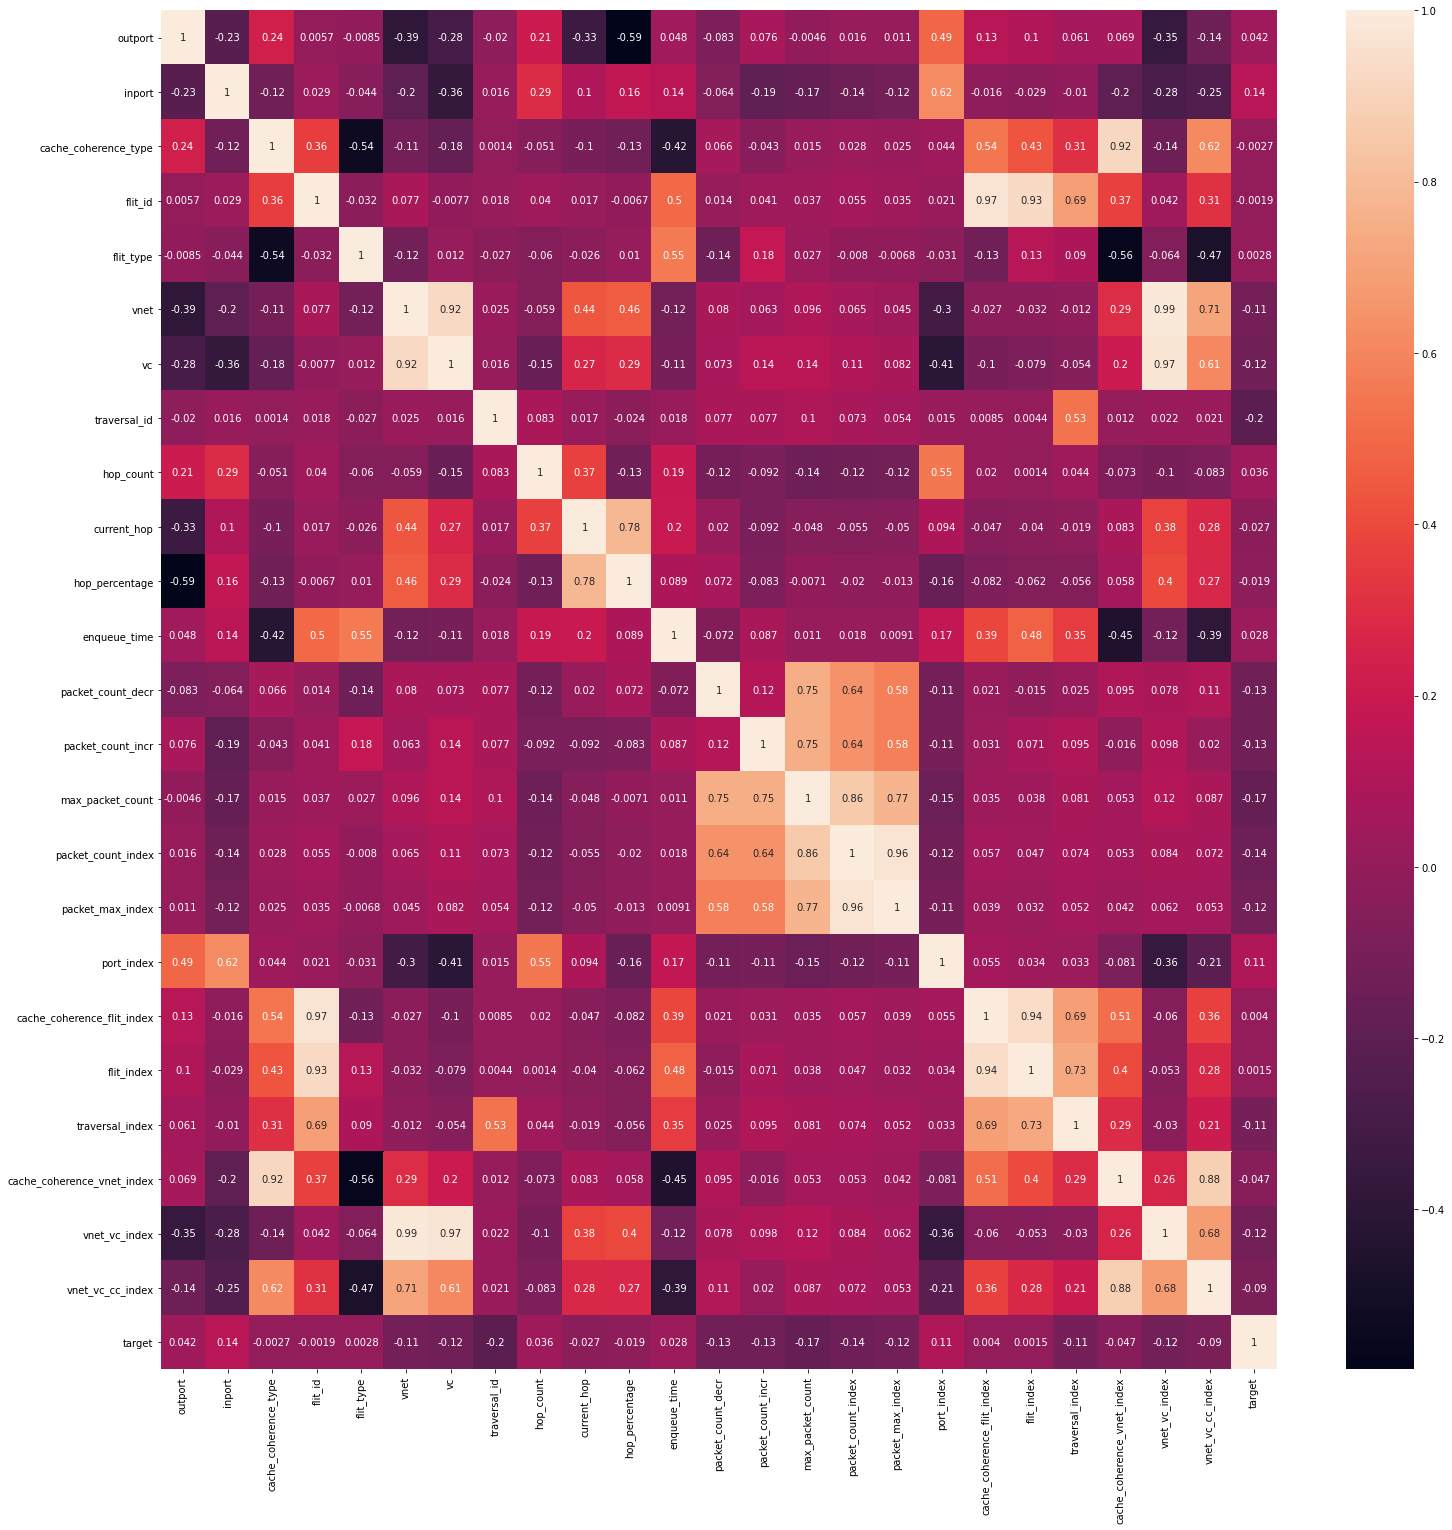

In [106]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [107]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9
1,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
2,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
3,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
4,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393242,4,2,6,3,2,3,9,30054,3,1,0.333333,22,1,1,1,1,1,8,18,36,1081944,18,27,54
393243,4,2,6,4,2,3,9,30054,3,1,0.333333,29,1,1,1,1,1,8,24,48,1442592,18,27,54
393244,4,2,6,5,3,3,9,30054,3,1,0.333333,36,1,1,1,1,1,8,30,90,2704860,18,27,54
393245,4,2,2,1,4,3,10,30055,3,1,0.333333,36,2,1,2,2,4,8,2,8,240440,6,30,18


In [108]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.500000,0.0,0.000000,0.000000,0.205882,0.000000,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393242,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000,0.998837,0.500000,0.2,0.333333,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.399547,0.833333,0.000000,0.494505
393243,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000,0.998837,0.500000,0.2,0.333333,0.378788,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.532730,0.833333,0.000000,0.494505
393244,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000,0.998837,0.500000,0.2,0.333333,0.484848,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.998870,0.833333,0.000000,0.494505
393245,1.0,0.5,0.166667,0.00,1.000000,0.0,0.125,0.998870,0.500000,0.2,0.333333,0.484848,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.034483,0.046512,0.088790,0.166667,0.051724,0.098901


In [109]:
train_X[train_X.duplicated()].shape

(5621, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [111]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.250000,0.062500,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.666667,0.400000,0.125000,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.333333,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.666667,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70282,0.50,1.0,0.000000,0.00,1.000000,0.0,0.333333,0.999967,0.4,0.333333,0.333333,0.500000,0.000000,0.172414,0.172414,0.020921,0.004862,1.00,0.000000,0.000000,0.044449,0.000000,0.333333,0.000000
70283,0.50,1.0,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.137931,0.011628,0.055563,0.666667,0.000000,0.666667
70284,0.50,1.0,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.171875,0.068966,0.000000,0.068966,0.008368,0.001111,1.00,0.310345,0.186047,0.222258,0.666667,0.000000,0.666667
70285,0.50,1.0,0.666667,0.50,0.333333,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.281250,0.034483,0.034483,0.068966,0.012552,0.001528,1.00,0.482759,0.302326,0.333388,0.666667,0.000000,0.666667


In [112]:
test_X[test_X.duplicated()].shape

(56, 24)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [114]:
train_Y = df['target']
train_Y.value_counts()

0    336330
1     56917
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  3594.148598
22               vnet_vc_index  3016.645340
6                           vc  2588.772374
7                 traversal_id  2115.666516
14            max_packet_count  1663.328244
17                  port_index  1539.148470
1                       inport  1464.764502
13           packet_count_incr   836.473874
12           packet_count_decr   826.865533
15          packet_count_index   778.667415
20             traversal_index   705.542668
16            packet_max_index   511.404406
23            vnet_vc_cc_index   300.689322
0                      outport   153.287813
21  cache_coherence_vnet_index    80.862768
8                    hop_count    37.242341
9                  current_hop    32.006540


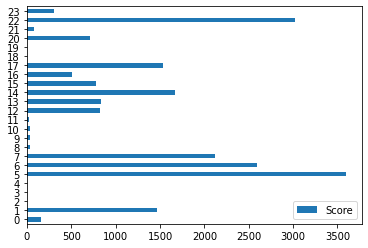

In [117]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [120]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 85.51766227904271
Test Prediction  85.62492053401144


In [122]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.99857726179806


In [123]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,4.441638
1,inport,2.059007
2,cache_coherence_type,1.869853
0,outport,1.509319
3,flit_id,1.019949
6,vc,0.846801
9,current_hop,0.521992
11,enqueue_time,0.413381
8,hop_count,0.105600
10,hop_percentage,0.104662


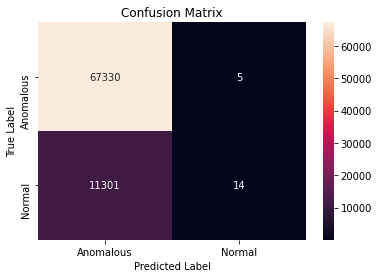

In [124]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     67335
           1       0.74      0.00      0.00     11315

    accuracy                           0.86     78650
   macro avg       0.80      0.50      0.46     78650
weighted avg       0.84      0.86      0.79     78650



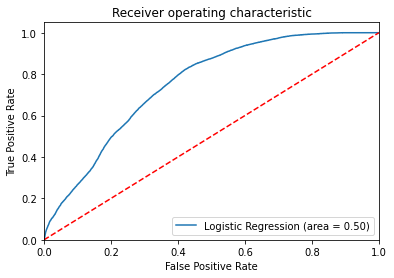

In [126]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

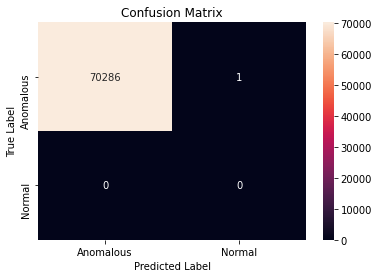

In [127]:
cm = confusion_matrix(test_Y, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [128]:
print(classification_report(test_Y, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70287
           1       0.00      0.00      0.00         0

    accuracy                           1.00     70287
   macro avg       0.50      0.50      0.50     70287
weighted avg       1.00      1.00      1.00     70287



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [129]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [131]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 91.25675070010205
Test Prediction  87.88175460902734


In [132]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  95.84702718852704


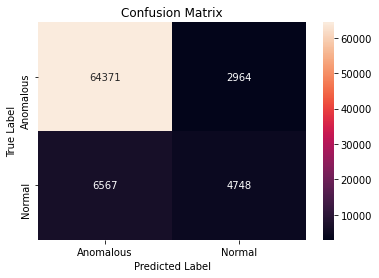

In [134]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [135]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     67335
           1       0.62      0.42      0.50     11315

    accuracy                           0.88     78650
   macro avg       0.76      0.69      0.72     78650
weighted avg       0.87      0.88      0.87     78650



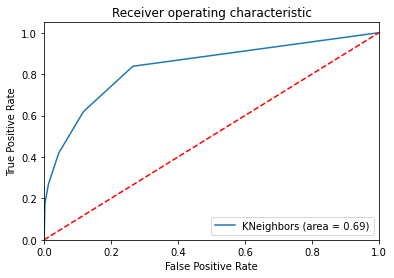

In [136]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

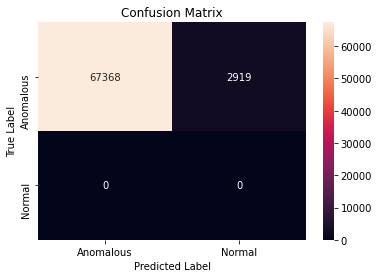

In [137]:
cm = confusion_matrix(test_Y, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [138]:
print(classification_report(test_Y,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     70287
           1       0.00      0.00      0.00         0

    accuracy                           0.96     70287
   macro avg       0.50      0.48      0.49     70287
weighted avg       1.00      0.96      0.98     70287



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [140]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [142]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 33.87063449428952
Test Prediction Score 33.735537190082646


In [143]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 39.84805156003244


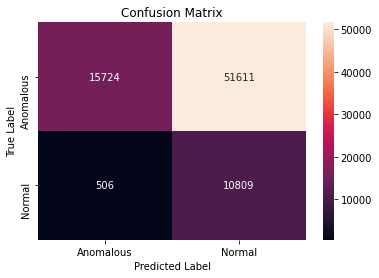

In [145]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [146]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.23      0.38     67335
           1       0.17      0.96      0.29     11315

    accuracy                           0.34     78650
   macro avg       0.57      0.59      0.33     78650
weighted avg       0.85      0.34      0.36     78650



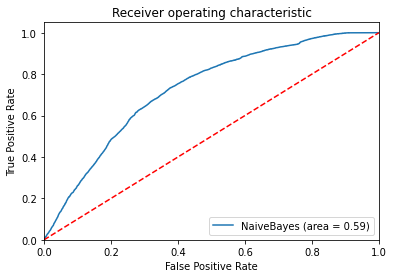

In [147]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [148]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [149]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 251677 samples, validate on 62920 samples
Epoch 1/10
251677/251677 [==============================] - 10s 38us/step - loss: 0.1169 - accuracy: 0.8520 - val_loss: 0.1133 - val_accuracy: 0.8542
Epoch 2/10
251677/251677 [==============================] - 9s 36us/step - loss: 0.1131 - accuracy: 0.8553 - val_loss: 0.1129 - val_accuracy: 0.8542
Epoch 3/10
251677/251677 [==============================] - 9s 37us/step - loss: 0.1128 - accuracy: 0.8553 - val_loss: 0.1128 - val_accuracy: 0.8542
Epoch 4/10
251677/251677 [==============================] - 9s 36us/step - loss: 0.1127 - accuracy: 0.8553 - val_loss: 0.1127 - val_accuracy: 0.8542
Epoch 5/10
251677/251677 [==============================] - 9s 37us/step - loss: 0.1126 - accuracy: 0.8553 - val_loss: 0.1126 - val_accuracy: 0.8542
Epoch 6/10
251677/251677 [==============================] - 9s 36us/step - loss: 0.1126 - accuracy: 0.8553 - val_loss: 0.1126 - val_accuracy: 0.8542
Epoch 7/10
251677/251677 [============================

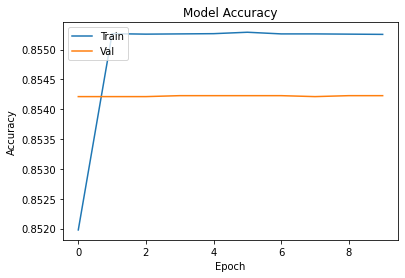

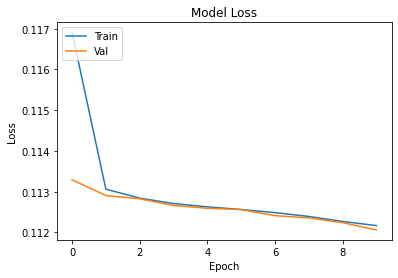

In [150]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [151]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.61%


In [152]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%


3-Layer Neural Network

In [153]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 251677 samples, validate on 62920 samples
Epoch 1/30
251677/251677 [==============================] - 9s 36us/step - loss: 0.1268 - accuracy: 0.8550 - val_loss: 0.1209 - val_accuracy: 0.8542
Epoch 2/30
251677/251677 [==============================] - 9s 35us/step - loss: 0.1182 - accuracy: 0.8553 - val_loss: 0.1170 - val_accuracy: 0.8542
Epoch 3/30
251677/251677 [==============================] - 9s 36us/step - loss: 0.1151 - accuracy: 0.8553 - val_loss: 0.1147 - val_accuracy: 0.8542
Epoch 4/30
251677/251677 [==============================] - 9s 35us/step - loss: 0.1138 - accuracy: 0.8553 - val_loss: 0.1138 - val_accuracy: 0.8542
Epoch 5/30
251677/251677 [==============================] - 9s 36us/step - loss: 0.1133 - accuracy: 0.8553 - val_loss: 0.1134 - val_accuracy: 0.8542
Epoch 6/30
251677/251677 [==============================] - 9s 35us/step - loss: 0.1130 - accuracy: 0.8553 - val_loss: 0.1131 - val_accuracy: 0.8542
Epoch 7/30
251677/251677 [=============================

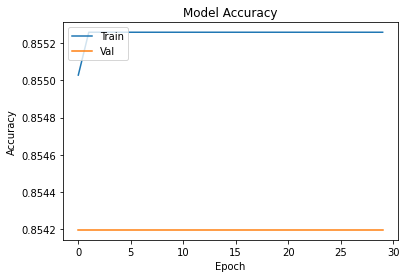

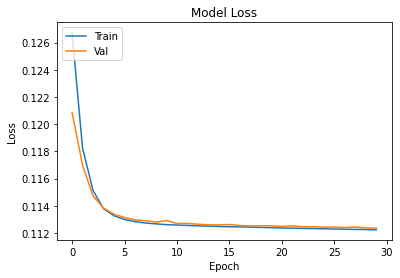

In [154]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [155]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.61%


In [156]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%


4-Layer Neural Network



In [157]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 251677 samples, validate on 62920 samples
Epoch 1/30
251677/251677 [==============================] - 9s 37us/step - loss: 0.1318 - accuracy: 0.8526 - val_loss: 0.1244 - val_accuracy: 0.8542
Epoch 2/30
251677/251677 [==============================] - 9s 37us/step - loss: 0.1225 - accuracy: 0.8553 - val_loss: 0.1216 - val_accuracy: 0.8542
Epoch 3/30
251677/251677 [==============================] - 9s 37us/step - loss: 0.1193 - accuracy: 0.8553 - val_loss: 0.1182 - val_accuracy: 0.8542
Epoch 4/30
251677/251677 [==============================] - 9s 37us/step - loss: 0.1163 - accuracy: 0.8553 - val_loss: 0.1154 - val_accuracy: 0.8542
Epoch 5/30
251677/251677 [==============================] - 9s 37us/step - loss: 0.1144 - accuracy: 0.8553 - val_loss: 0.1140 - val_accuracy: 0.8542
Epoch 6/30
251677/251677 [==============================] - 9s 38us/step - loss: 0.1134 - accuracy: 0.8553 - val_loss: 0.1133 - val_accuracy: 0.8542
Epoch 7/30
251677/251677 [=============================

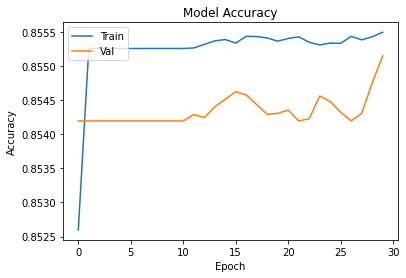

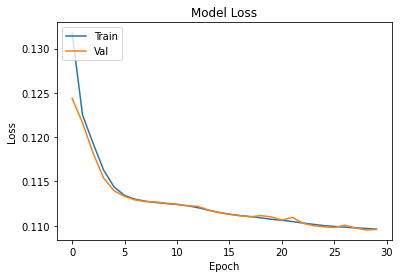

In [158]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [159]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.73%


In [160]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.89%


5-Layer Neural Network Optimized

In [161]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 251677 samples, validate on 62920 samples
Epoch 1/100
251677/251677 [==============================] - 18s 72us/step - loss: 0.1107 - accuracy: 0.8549 - val_loss: 0.1059 - val_accuracy: 0.8542
Epoch 2/100
251677/251677 [==============================] - 17s 69us/step - loss: 0.1065 - accuracy: 0.8557 - val_loss: 0.1045 - val_accuracy: 0.8548
Epoch 3/100
251677/251677 [==============================] - 17s 69us/step - loss: 0.1047 - accuracy: 0.8571 - val_loss: 0.1010 - val_accuracy: 0.8574
Epoch 4/100
251677/251677 [==============================] - 17s 69us/step - loss: 0.1032 - accuracy: 0.8589 - val_loss: 0.1024 - val_accuracy: 0.8582
Epoch 5/100
251677/251677 [==============================] - 18s 70us/step - loss: 0.1020 - accuracy: 0.8603 - val_loss: 0.0968 - val_accuracy: 0.8634
Epoch 6/100
251677/251677 [==============================] - 18s 71us/step - loss: 0.1007 - accuracy: 0.8616 - val_loss: 0.0953 - val_accuracy: 0.8652
Epoch 7/100
251677/251677 [================

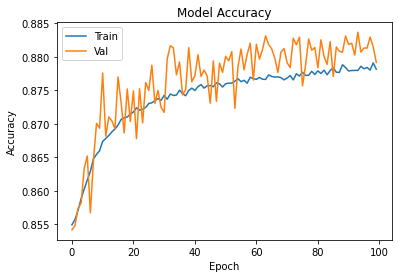

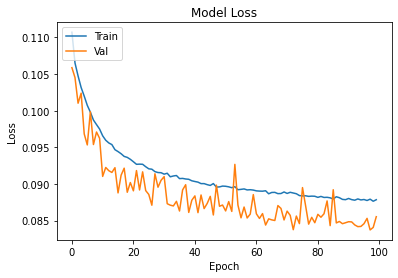

In [162]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [163]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.01%


In [164]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.01%


In [165]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 251677 samples, validate on 62920 samples
Epoch 1/50
251677/251677 [==============================] - 18s 73us/step - loss: 0.1109 - accuracy: 0.8550 - val_loss: 0.1059 - val_accuracy: 0.8553
Epoch 2/50
251677/251677 [==============================] - 18s 72us/step - loss: 0.1069 - accuracy: 0.8558 - val_loss: 0.1041 - val_accuracy: 0.8550
Epoch 3/50
251677/251677 [==============================] - 18s 72us/step - loss: 0.1056 - accuracy: 0.8568 - val_loss: 0.1028 - val_accuracy: 0.8560
Epoch 4/50
251677/251677 [==============================] - 19s 74us/step - loss: 0.1044 - accuracy: 0.8583 - val_loss: 0.1004 - val_accuracy: 0.8597
Epoch 5/50
251677/251677 [==============================] - 19s 74us/step - loss: 0.1035 - accuracy: 0.8587 - val_loss: 0.0994 - val_accuracy: 0.8648
Epoch 6/50
251677/251677 [==============================] - 19s 76us/step - loss: 0.1029 - accuracy: 0.8589 - val_loss: 0.0985 - val_accuracy: 0.8628
Epoch 7/50
251677/251677 [=======================

In [166]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.99%


In [167]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.64%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [169]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [171]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.74409800474893
Test Prediction Score 94.61665607120152


In [172]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 93.63751476090884


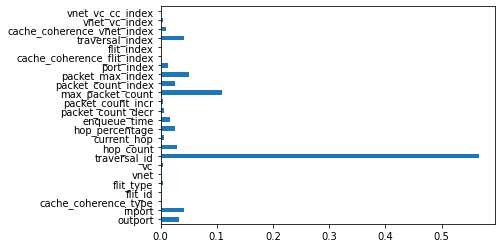

In [173]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

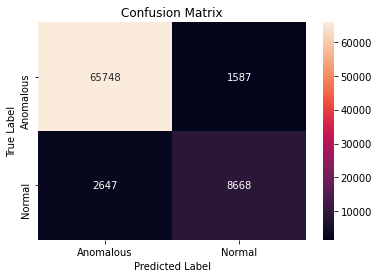

In [174]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [175]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     67335
           1       0.85      0.77      0.80     11315

    accuracy                           0.95     78650
   macro avg       0.90      0.87      0.89     78650
weighted avg       0.94      0.95      0.95     78650



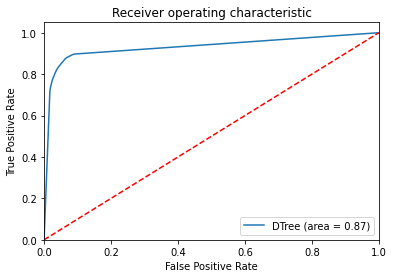

In [176]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [178]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [180]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.07309987062814
Test Prediction Score 95.177368086459


In [181]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 96.58258283893181


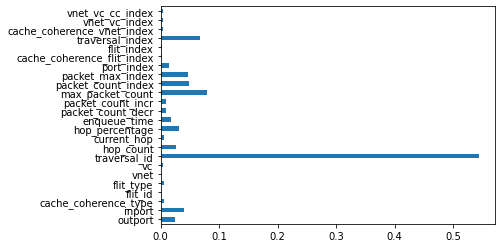

In [182]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

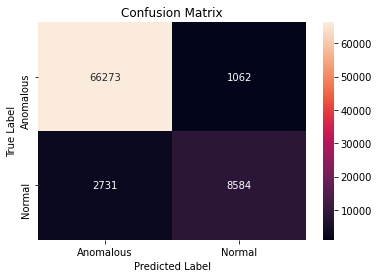

In [183]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [184]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     67335
           1       0.89      0.76      0.82     11315

    accuracy                           0.95     78650
   macro avg       0.93      0.87      0.90     78650
weighted avg       0.95      0.95      0.95     78650



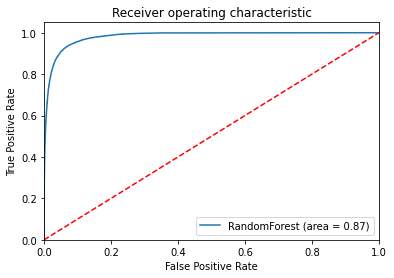

In [185]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [187]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [189]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.74443494375343
Test Prediction Score 96.82644628099175


In [190]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 97.46041230953092


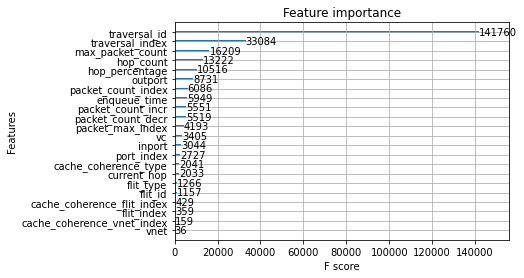

In [191]:
plot_importance(xgbc)
plt.show()

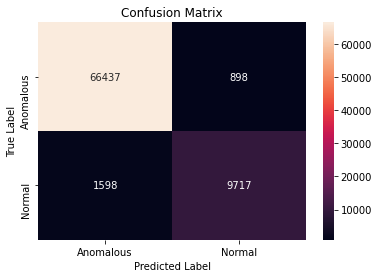

In [192]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [193]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     67335
           1       0.92      0.86      0.89     11315

    accuracy                           0.97     78650
   macro avg       0.95      0.92      0.93     78650
weighted avg       0.97      0.97      0.97     78650



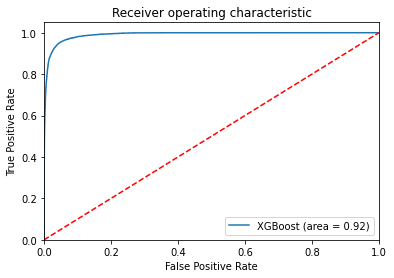

In [194]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [196]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [198]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 92.08288699510803
Test Prediction Score 91.27018436109346


In [199]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 97.97544353863445


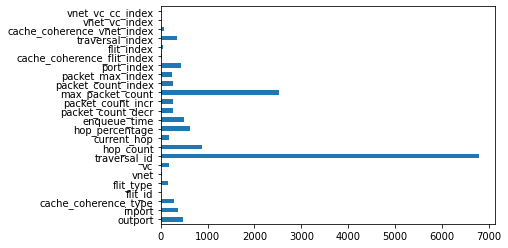

In [200]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

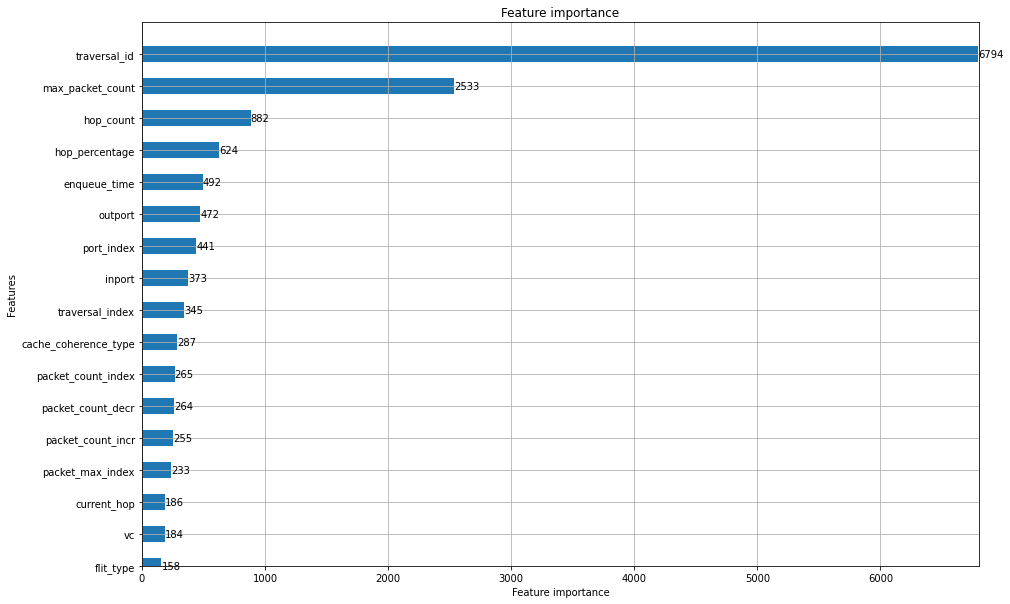

In [206]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [202]:
sorted(gbm.feature_importances_,reverse=True)

[6794,
 2533,
 882,
 624,
 492,
 472,
 441,
 373,
 345,
 287,
 265,
 264,
 255,
 233,
 186,
 184,
 158,
 75,
 60,
 41,
 26,
 10,
 0,
 0]

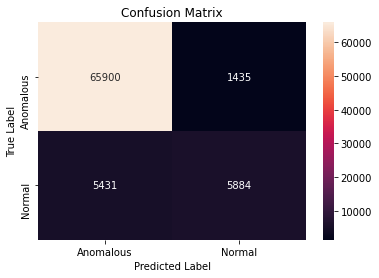

In [203]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [204]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     67335
           1       0.80      0.52      0.63     11315

    accuracy                           0.91     78650
   macro avg       0.86      0.75      0.79     78650
weighted avg       0.91      0.91      0.90     78650



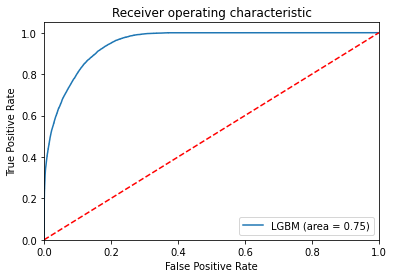

In [205]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()